## 1. Preparation

In [140]:
# import needed libraries

import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import os
import plotly.express as px

In [141]:
# Download latest version
path = kagglehub.dataset_download("kyanyoga/sample-sales-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sample-sales-data


In [142]:
all_files = os.listdir('/root/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1')
for file in all_files:
    print(file)

sales_data_sample.csv


In [143]:
raw = pd.read_csv(
    '/root/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1/sales_data_sample.csv',
    encoding='latin1'
)

## 2. Explore the data

In [144]:
# Drop unnecessary columns

to_drop = ['ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE','TERRITORY','PHONE','CONTACTLASTNAME','CONTACTFIRSTNAME','ORDERLINENUMBER','MSRP','PRODUCTCODE']
raw = raw.drop(to_drop, axis = 1)

In [145]:
# Change data type of ORDERDATE to datetime type

raw['ORDERDATE'] = pd.to_datetime(raw['ORDERDATE'])

In [147]:
# Summary stats of Quantitative variables

quantitive_vars = ['QUANTITYORDERED','PRICEEACH', 'SALES']
describe_quantitive_vars = raw[quantitive_vars].describe()
describe_quantitive_vars.style.background_gradient(cmap = "Blues")

,QUANTITYORDERED,PRICEEACH,SALES
count,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072
std,9.741443,20.174277,1841.865106
min,6.000000,26.880000,482.130000
25%,27.000000,68.860000,2203.430000
50%,35.000000,95.700000,3184.800000
75%,43.000000,100.000000,4508.000000
max,97.000000,100.000000,14082.800000


## 3. Analyze and Visualize Data

#### ( •̀ ω •́ )y Color Palette

In [148]:
pastel_colors = [
    "#FFB5A7",  # Coral Blush
    "#FCD5CE",  # Peony Pink
    "#F8E1D4",  # Apricot Cream
    "#A5A58D",  # Olive Sage
    "#B5E2FA",  # Sky Mist
    "#99C1B9",  # Mint Grey
    "#E4C1F9",  # Lavender Frost
    "#CBAACB",  # Soft Lilac
    "#FFFFB5",  # Butter Yellow
    "#FFC8DD",  # Rosy Cotton
    "#D8E2DC",  # Feather White
    "#A9DEF9",  # Cool Ice Blue
    "#EDE0D4",  # Oatmilk Beige
    "#DAD7CD",  # Mossy Neutral
    "#BFD8B8",  # Celery Toned
    "#C6DEF1",  # Baby Blue Grey
    "#FFDAC1",  # Peach Puff
    "#F9C6C9",  # Petal Pink
    "#ECD5E3",  # Mauve Mist
    "#C3F0CA",  # Pastel Mint
]

### 3.1. Annual Revenue

In [149]:
# Annual Revenue
annual_revenue = pd.DataFrame(raw.groupby(['YEAR_ID'])['SALES'].sum()).reset_index()
annual_revenue.style.background_gradient(cmap = "Blues")

,YEAR_ID,SALES
0,2003,3516979.540000
1,2004,4724162.600000
2,2005,1791486.710000


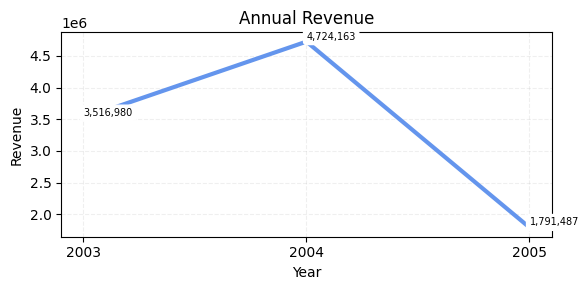

In [150]:
# Plot Chart for Annual Revenue
fig, ax = plt.subplots(figsize=(6, 3))

year = annual_revenue['YEAR_ID'].tolist()
sales = annual_revenue['SALES'].tolist()

plt.plot(
    year, #
    sales,
    color="#6495ED",
    linewidth = 3
)

for x, y in zip(year, sales):
    plt.text(
        x, y , f'{y:,.0f}',
        ha='left',
        va='bottom',
        fontsize=7,
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round')
                 )

plt.title("Annual Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.xticks(year)
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()


# matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)

### 3.2. Monthly Revenue

In [151]:
# Monthly Revenue
monthly_revenue = pd.DataFrame(raw.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum()).reset_index()

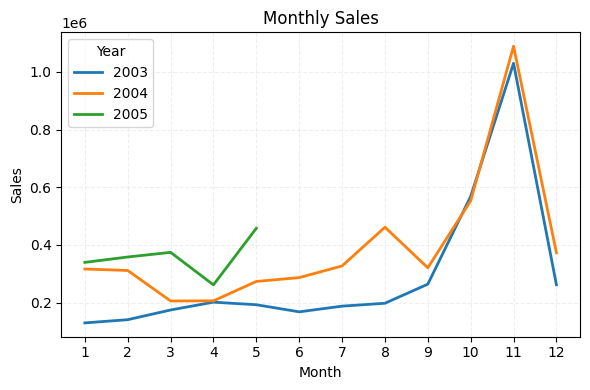

In [152]:

fig, ax = plt.subplots(figsize = (6,4))

for year in monthly_revenue['YEAR_ID'].unique():
    yearly_data = monthly_revenue[monthly_revenue['YEAR_ID'] == year]
    plt.plot(
        yearly_data['MONTH_ID'],
        yearly_data['SALES'],
        label=str(year),
        linewidth = 2
    )

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True, linestyle = '--', alpha = 0.2)
plt.tight_layout()

plt.show()

### 3.3. Sales by Country

In [153]:
sales_by_country = pd.DataFrame(raw.groupby(['COUNTRY'])['SALES'].sum()).reset_index()
sales_by_country = sales_by_country.sort_values(by = "SALES", ascending = False)

In [154]:
sales_by_country.reset_index(inplace=True)

In [155]:
sales_by_country = sales_by_country.drop('index',axis=1)

In [156]:
# Create labels of top 5 countries for pie chart

custom_labels = []
for i in range (0,5):
    country = sales_by_country["COUNTRY"][i]
    custom_labels.append(country)
for i in range (5,len(sales_by_country["COUNTRY"])):
    custom_labels.append("")


In [157]:
# Create a function that only show top 5 percentages

def custom_pct(pct):
    idx = custom_pct.idx
    custom_pct.idx += 1
    return f'{pct:.1f}%' if idx < 5 else ''

custom_pct.idx = 0


In [158]:
# Modify explosion to emphasis top 5 countries

custom_explode = []
for i in range (0,5):
    explode = 0.05
    custom_explode.append(explode)
for i in range (5,len(sales_by_country["COUNTRY"])):
    explode = 0
    custom_explode.append(explode)

In [159]:
custom_explode = tuple(custom_explode)

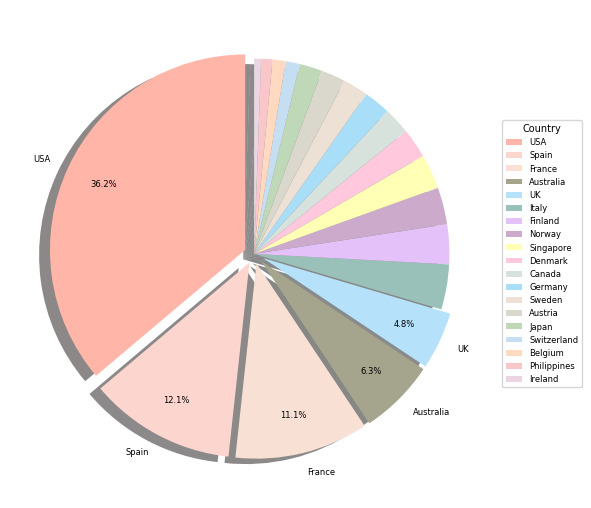

In [160]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(
    sales_by_country["SALES"],
    labels = custom_labels,
    colors = pastel_colors,
    startangle = 90,
    textprops = {'fontsize': 6},
    autopct = custom_pct,
    pctdistance = 0.8,
    explode = custom_explode,
    shadow = {'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}
)

plt.legend(
    sales_by_country["COUNTRY"],
    title="Country",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=6,
    title_fontsize=7
)

plt.tight_layout()
plt.show()


### 3.4. Sales by Product Lines of each Country

In [161]:
sales_by_lines = pd.DataFrame(raw['SALES'].groupby(raw['PRODUCTLINE']).sum().reset_index())

In [162]:
sales_by_lines = sales_by_lines.sort_values(by = 'SALES', ascending=False)

In [163]:
sales_by_lines.reset_index(inplace = True, drop=True)
sales_by_lines.style.background_gradient(cmap = "Blues")

,PRODUCTLINE,SALES
0,Classic Cars,3919615.660000
1,Vintage Cars,1903150.840000
2,Motorcycles,1166388.340000
3,Trucks and Buses,1127789.840000
4,Planes,975003.570000
5,Ships,714437.130000
6,Trains,226243.470000


In [164]:
lines_countries = pd.DataFrame(raw.groupby(['COUNTRY','PRODUCTLINE'])['SALES'].sum().reset_index())

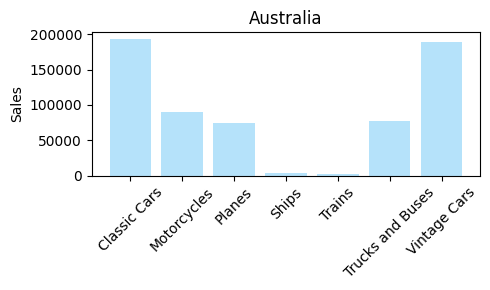

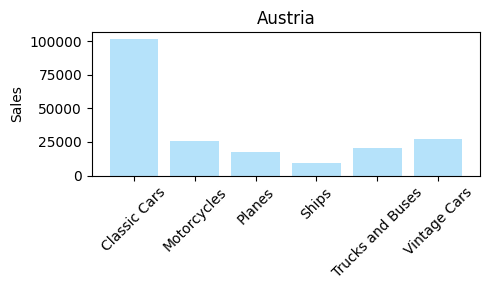

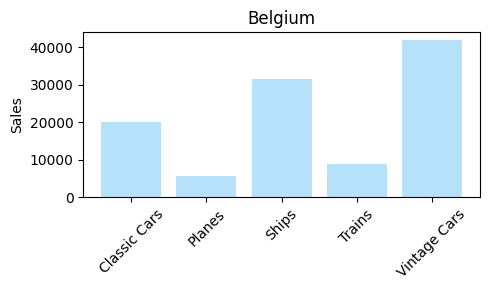

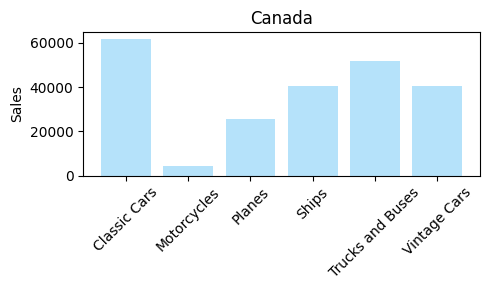

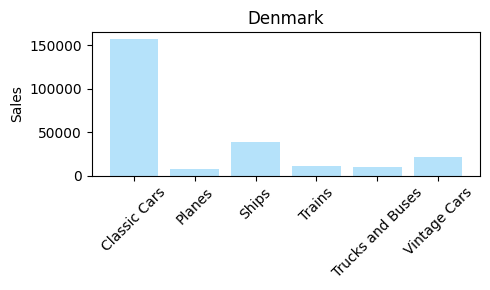

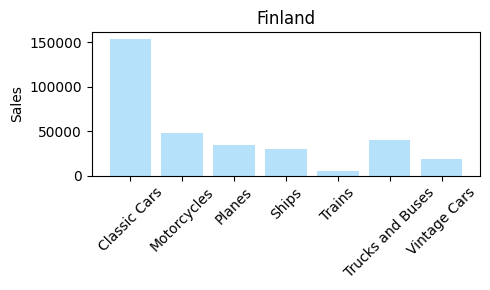

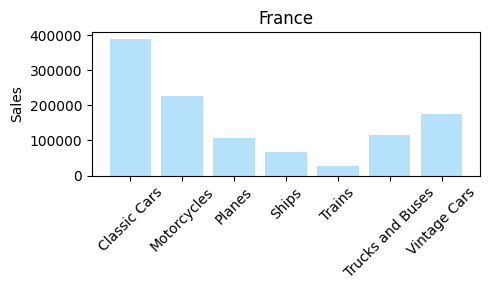

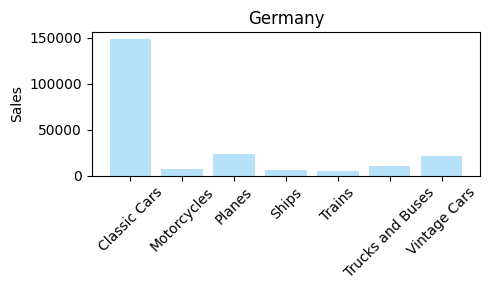

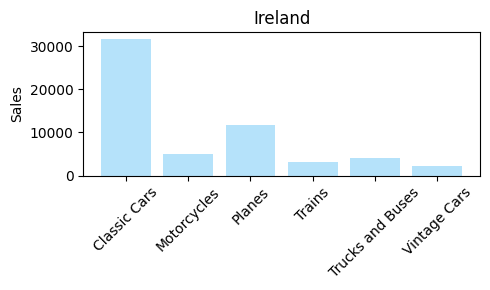

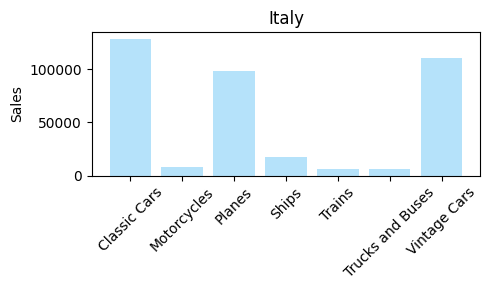

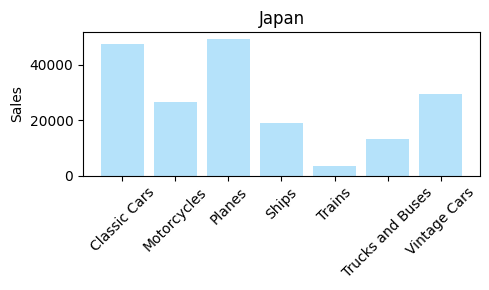

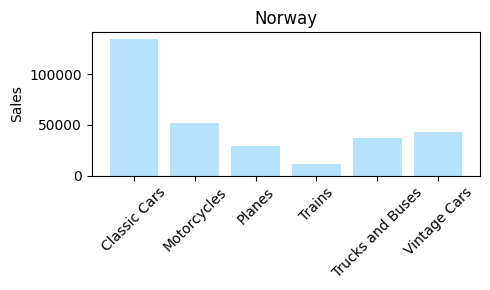

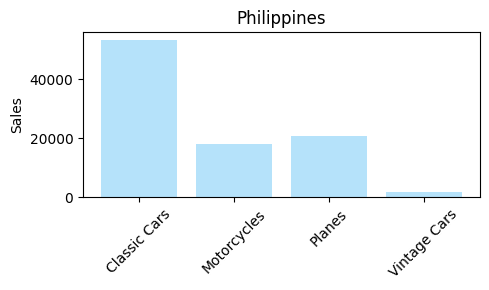

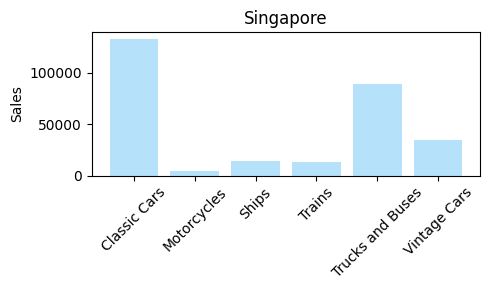

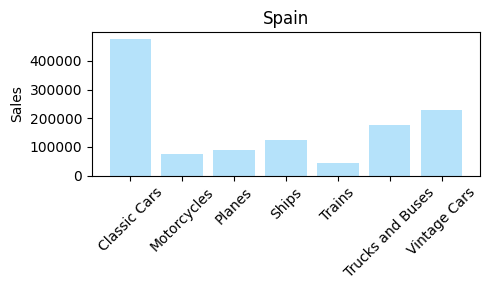

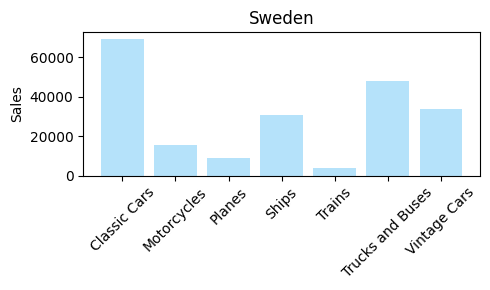

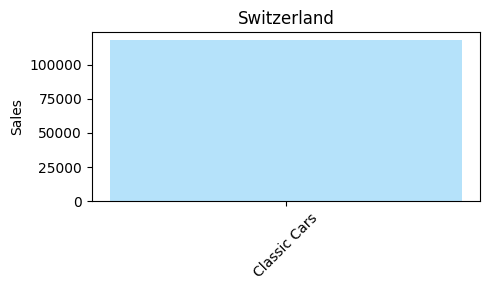

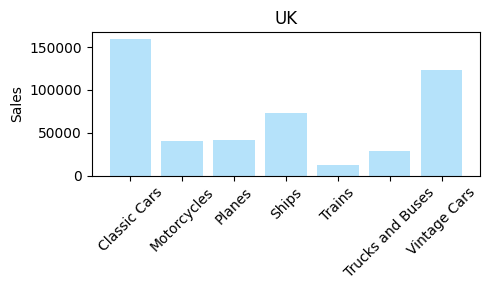

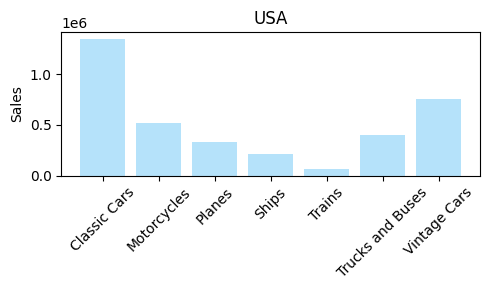

In [165]:
for country in lines_countries['COUNTRY'].unique():

  data = lines_countries[lines_countries['COUNTRY'] == country]
  lines = data['PRODUCTLINE']
  sales = data['SALES']

  plt.figure(figsize=(5, 3))
  plt.bar(
      lines,
      sales,
      color = "#B5E2FA")

  plt.title(country)
  plt.ylabel('Sales')
  plt.xticks(rotation = 45)

  plt.tight_layout()
  plt.show()

### 3.5. Sales by Deal Size

In [166]:
sales_by_dealsize = pd.DataFrame(raw.groupby(['DEALSIZE'])['SALES'].sum().reset_index())

In [167]:
sales_by_dealsize['PERCENTAGE'] = sales_by_dealsize['SALES'] / sales_by_dealsize['SALES'].sum()

In [168]:
sales_by_dealsize.style \
    .format({
        'PERCENTAGE': '{:.2%}',
        'SALES': '{:.0f}'
    }) \
    .background_gradient(cmap="Blues", subset=['PERCENTAGE'])


,DEALSIZE,SALES,PERCENTAGE
0,Large,1302119,12.98%
1,Medium,6087432,60.68%
2,Small,2643077,26.34%


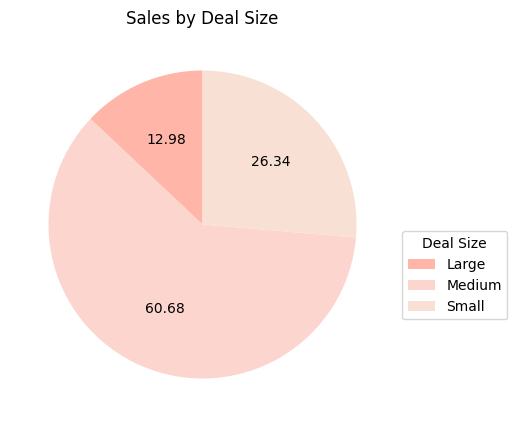

In [169]:
plt.figure(figsize = (5,5))
plt.pie(
    sales_by_dealsize['SALES'],
    colors = pastel_colors,
    autopct = '%.2f',
    startangle = 90
    )

plt.legend(
    sales_by_dealsize['DEALSIZE'],
    title = "Deal Size",
    bbox_to_anchor = (1,0.5)
)
plt.title("Sales by Deal Size")
plt.show()